In [2]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK_CLEAN_55_PERFEITO_SAVE_Block_Arduino_25_PERFECT_DOC_BREED_aligned_BEHAVIOR_work2_SIMILARITY_SEGREGATION_CENTROIDE_work experiment_centroid-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       '( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)',
       '( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y'],
      dtype='object')

In [4]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y
0,1,1.5,1,10,0.05,0,2.631579,2.250000,0.095833,0.000000,0.398333,0.0750,0.000000,0.000000
1,3,1.5,1,10,0.15,0,2.808824,2.583333,0.000000,0.000000,0.304167,0.0125,0.000000,0.000000
2,5,1.5,1,20,0.05,0,2.763158,1.500000,0.037500,0.000000,0.262500,0.0000,0.000000,0.000000
3,7,1.5,1,30,0.05,0,2.184211,3.250000,0.075000,0.000000,0.343036,0.1875,0.000000,0.000000
4,2,1.5,1,10,0.05,0,2.723684,1.500000,0.037500,0.000000,0.316667,0.0125,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,105,5.5,5,30,0.15,86,2.191176,3.833333,0.736840,1.646203,0.616916,25.5250,-0.333897,-0.504456
9824,105,5.5,5,30,0.15,87,2.117647,4.333333,0.735542,1.643038,0.618225,25.4000,-0.146397,-0.616956
9825,105,5.5,5,30,0.15,88,2.220588,2.916667,0.736613,1.641139,0.619039,25.3250,-0.021397,-0.391956
9826,105,5.5,5,30,0.15,89,2.073529,4.083333,0.736220,1.639557,0.619701,25.2625,-0.246397,-0.529456


In [5]:
df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.354554        2.439815      0.036053   
                      1         1.736219        3.104167      0.050347   
                      2         2.124527        3.414352      0.060532   
                      3         2.067552        3.891204      0.069375   
                      4         2.151896        2.516204      0.081447   
...                                  ...             ...           ...   
5.5                   86        2.181029        3.638889      0.706762   
                      87        2.046031        3.879630      0.706932   
                      88        2.163829        2.692130      0.707146   
                      89        1.897080        3.287037      0.707338   
                      90        2.305943        3.692130      0.707991   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.284547     0.060417    0.000000   
                      1     0.000000   0.298201     0.126042    0.170068   
                      2     0.000000   0.349621     0.180556    0.179702   
                      3     0.000000   0.357687     0.404167    0.203660   
                      4     0.000000   0.367983     0.585069    0.221406   
...                              ...        ...          ...         ...   
5.5                   86    1.705582   0.512441    42.426042   -0.069038   
                      87    1.701644   0.513506    42.263889   -0.045774   
                      88    1.699130   0.514216    42.157292   -0.026677   
                      89    1.695737   0.515173    42.020139   -0.007580   
                      90    1.693346   0.516083    41.854167    0.019851   

                            centroid-y  
radius-of-interaction step              
1.5                   0       0.000000  
                      1       0.294459  
                      2       0.287501  
                      3       0.291668  
                      4       0.300370  
...                                ...  
5.5                   86     -0.084258  
                      87     -0.077313  
                      88     -0.060994  
                      89     -0.075577  
                      90     -0.069327  

[273 rows x 8 columns]

In [6]:
df_move=df4.groupby(['movement-steps','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
movement-steps step                                                         
1              0         2.348168        2.467593      0.253079  0.000000   
               1         1.727253        3.277778      0.317302  0.640893   
               2         2.088773        3.432870      0.358930  0.589557   
               3         2.057835        4.037037      0.377046  0.878586   
               4         2.117411        2.500000      0.395225  0.962992   
...                           ...             ...           ...       ...   
5              86        2.207903        3.701389      0.484364  1.064654   
               87        2.082387        4.134259      0.485431  1.063019   
               88        2.198744        2.775463      0.487773  1.061340   
               89        1.923246        3.469907      0.488731  1.058404   
               90        2.341288        3.775463      0.491150  1.057226   

                     closeness  betweenness  centroid-x  centroid-y  
movement-steps step                                                  
1              0      0.326000    50.640278    0.000000    0.000000  
               1      0.330221    51.437847    0.235155   -0.036583  
               2      0.348038    49.823611    0.243687   -0.042102  
               3      0.342666    56.057639    0.241951   -0.048005  
               4      0.349459    53.991319    0.254892   -0.050092  
...                        ...          ...         ...         ...  
5              86     0.505346    33.801736    0.017242    0.187267  
               87     0.506312    33.782639    0.005783    0.195253  
               88     0.507380    33.608681    0.040853    0.160530  
               89     0.508731    33.386806    0.081825    0.146989  
               90     0.509564    33.266319    0.128353    0.140044  

[273 rows x 8 columns]

In [7]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

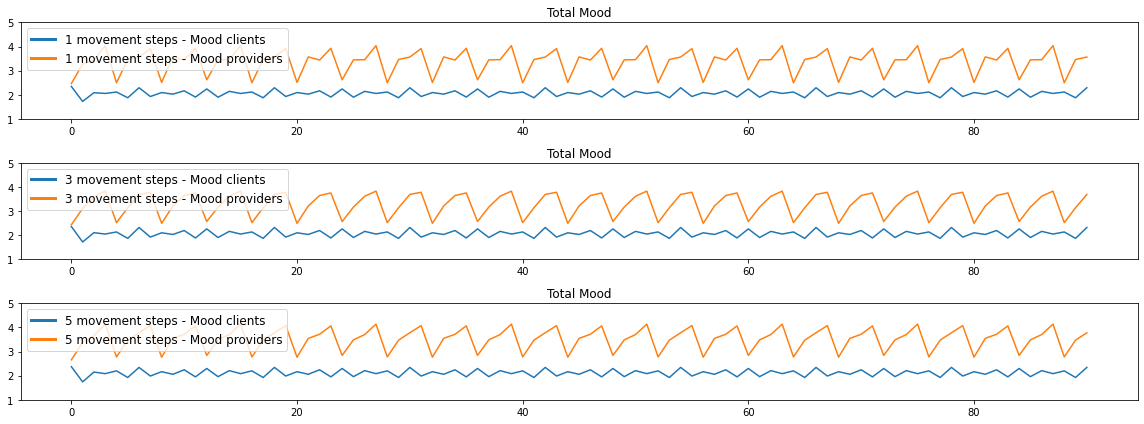

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_clients'], label='{} movement steps - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_providers'], label='{} movement steps - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



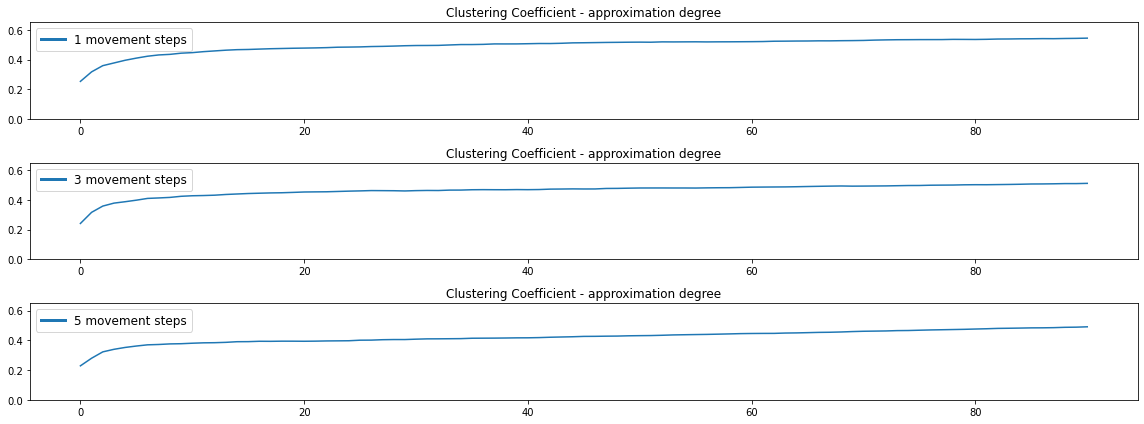

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['cluster_coef'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



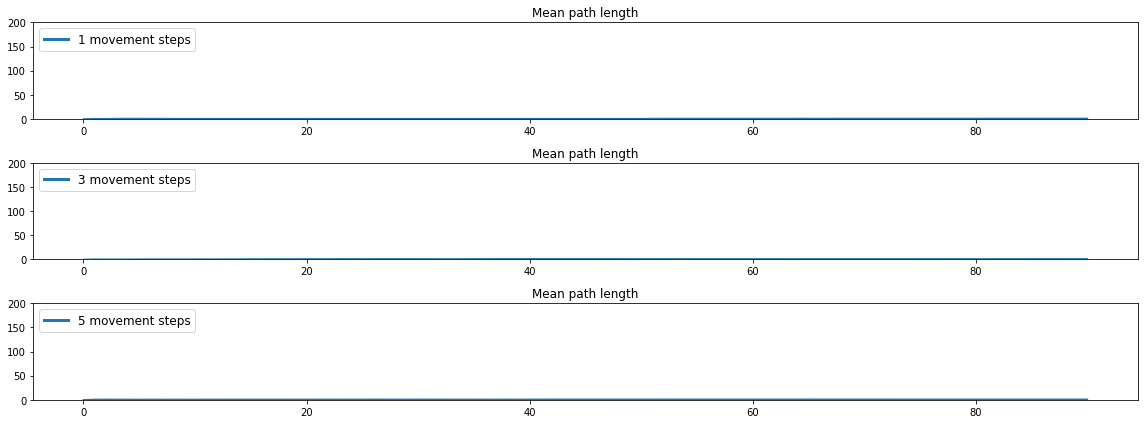

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['paths'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



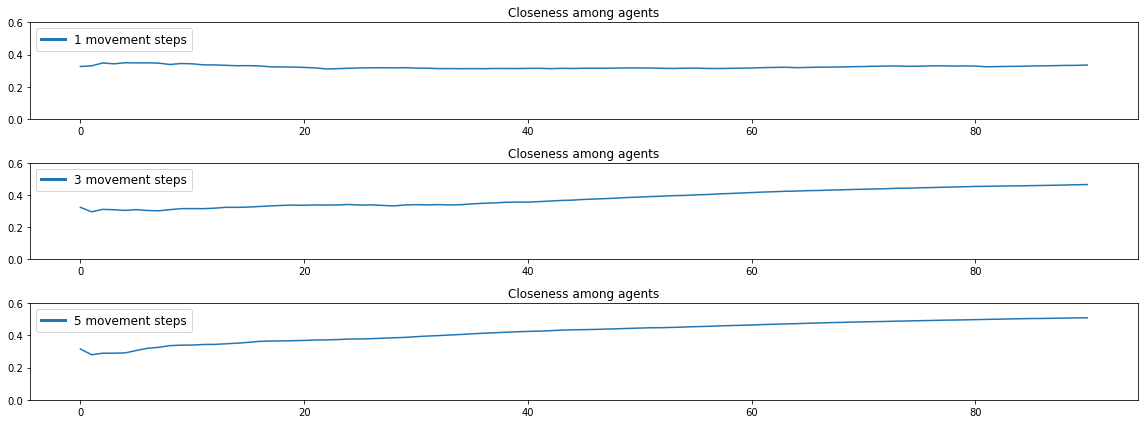

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['closeness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



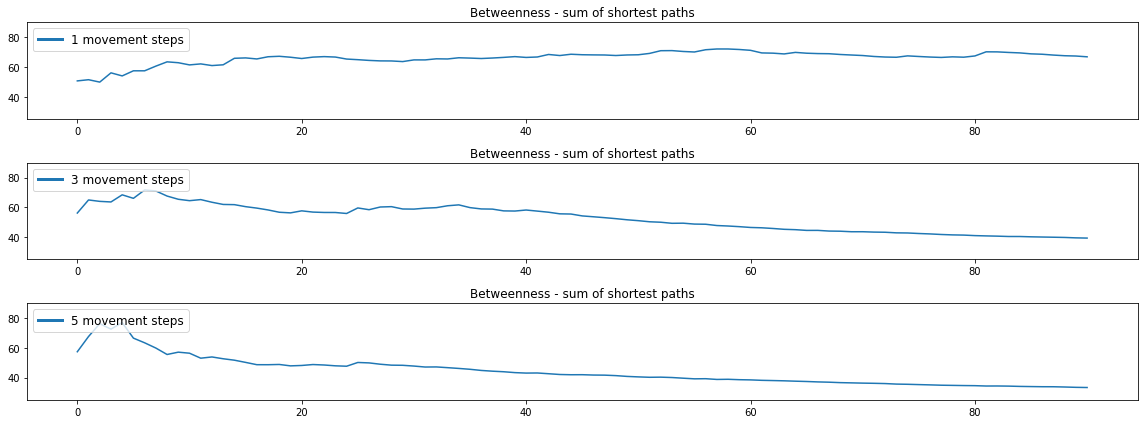

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [13]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].mean()

In [14]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1]

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,total_mood
0,1,0,2.348168,2.467593,0.253079,0.000000,0.326000,50.640278,0.000000,0.000000,4.815761
1,1,1,1.727253,3.277778,0.317302,0.640893,0.330221,51.437847,0.235155,-0.036583,5.005031
2,1,2,2.088773,3.432870,0.358930,0.589557,0.348038,49.823611,0.243687,-0.042102,5.521643
3,1,3,2.057835,4.037037,0.377046,0.878586,0.342666,56.057639,0.241951,-0.048005,6.094872
4,1,4,2.117411,2.500000,0.395225,0.962992,0.349459,53.991319,0.254892,-0.050092,4.617411
...,...,...,...,...,...,...,...,...,...,...,...
86,1,86,2.144844,3.456019,0.540793,1.223954,0.330234,68.569792,0.223990,-0.110508,5.600863
87,1,87,2.057835,4.037037,0.540466,1.221501,0.331380,68.011111,0.212184,-0.110856,6.094872
88,1,88,2.117411,2.500000,0.541707,1.219787,0.332714,67.574653,0.230934,-0.110508,4.617411
89,1,89,1.879644,3.462963,0.542557,1.214100,0.333290,67.373958,0.242392,-0.110856,5.342607


In [15]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [16]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-2.46,0.0148
1,mood_providers,-2.0912,0.0379
2,cluster_coef,10.3602,0.0
3,paths,-2.9464,0.0036
4,closeness,-14.8826,0.0
5,betweenness,19.6146,0.0
6,centroid-x,16.1579,0.0
7,centroid-y,-13.6938,0.0
8,total_mood,-3.0025,0.0031


In [17]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,6.0515,0.0148
1,mood_providers,4.3731,0.0379
2,cluster_coef,107.3328,0.0
3,paths,8.6814,0.0036
4,closeness,221.4922,0.0
5,betweenness,384.7324,0.0
6,centroid-x,261.078,0.0
7,centroid-y,187.5203,0.0
8,total_mood,9.0149,0.0031


In [18]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:].columns

Index(['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood'],
      dtype='object')

In [19]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients     -0.4615
mood_providers   -0.4556
cluster_coef      0.7897
paths             0.2046
closeness        -0.8278
betweenness      -0.0076
total_mood       -0.1975
centroid-x       -0.5018
centroid-y       -0.0341
dtype: float64

In [20]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6266
mood_providers   -0.3010
cluster_coef      0.7700
paths            -0.0759
closeness         0.9801
betweenness       0.8689
total_mood       -0.0635
centroid-x        0.1974
centroid-y        0.5406
dtype: float64

In [21]:
df_move.reset_index()

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,total_mood
0,1,0,2.3482,2.4676,0.2531,0.0000,0.3260,50.6403,0.0000,0.0000,4.8158
1,1,1,1.7273,3.2778,0.3173,0.6409,0.3302,51.4378,0.2352,-0.0366,5.0050
2,1,2,2.0888,3.4329,0.3589,0.5896,0.3480,49.8236,0.2437,-0.0421,5.5216
3,1,3,2.0578,4.0370,0.3770,0.8786,0.3427,56.0576,0.2420,-0.0480,6.0949
4,1,4,2.1174,2.5000,0.3952,0.9630,0.3495,53.9913,0.2549,-0.0501,4.6174
...,...,...,...,...,...,...,...,...,...,...,...
268,5,86,2.2079,3.7014,0.4844,1.0647,0.5053,33.8017,0.0172,0.1873,5.9093
269,5,87,2.0824,4.1343,0.4854,1.0630,0.5063,33.7826,0.0058,0.1953,6.2166
270,5,88,2.1987,2.7755,0.4878,1.0613,0.5074,33.6087,0.0409,0.1605,4.9742
271,5,89,1.9232,3.4699,0.4887,1.0584,0.5087,33.3868,0.0818,0.1470,5.3932


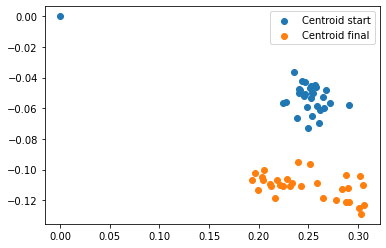

In [22]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [41]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
movement-steps step                                                       
1              0           2.3482          2.4676        0.2531  0.0000   
               1           1.7273          3.2778        0.3173  0.6409   
               2           2.0888          3.4329        0.3589  0.5896   
               3           2.0578          4.0370        0.3770  0.8786   
               4           2.1174          2.5000        0.3952  0.9630   
...                           ...             ...           ...     ...   
5              86          2.2079          3.7014        0.4844  1.0647   
               87          2.0824          4.1343        0.4854  1.0630   
               88          2.1987          2.7755        0.4878  1.0613   
               89          1.9232          3.4699        0.4887  1.0584   
               90          2.3413          3.7755        0.4912  1.0572   

                     closeness  betweenness  centroid-x  centroid-y  \
movement-steps step                                                   
1              0        0.3260      50.6403      0.0000      0.0000   
               1        0.3302      51.4378      0.2352     -0.0366   
               2        0.3480      49.8236      0.2437     -0.0421   
               3        0.3427      56.0576      0.2420     -0.0480   
               4        0.3495      53.9913      0.2549     -0.0501   
...                        ...          ...         ...         ...   
5              86       0.5053      33.8017      0.0172      0.1873   
               87       0.5063      33.7826      0.0058      0.1953   
               88       0.5074      33.6087      0.0409      0.1605   
               89       0.5087      33.3868      0.0818      0.1470   
               90       0.5096      33.2663      0.1284      0.1400   

                     total_mood  
movement-steps step              
1              0         4.8158  
               1         5.0050  
               2         5.5216  
               3         6.0949  
               4         4.6174  
...                         ...  
5              86        5.9093  
               87        6.2166  
               88        4.9742  
               89        5.3932  
               90        6.1168  

[273 rows x 9 columns]

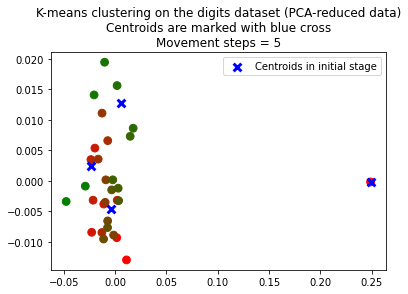

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()
plt.show()

In [24]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape

(91, 11)

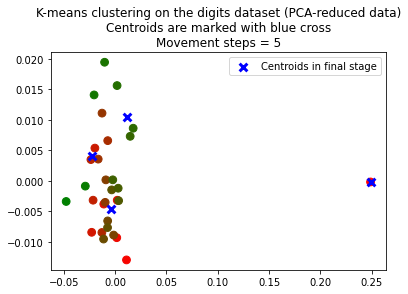

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()
plt.show()

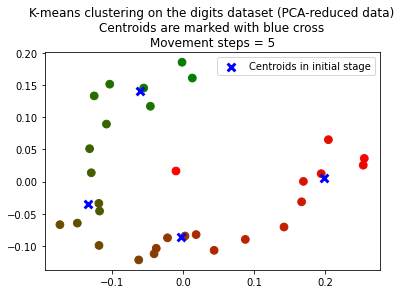

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()
plt.show()

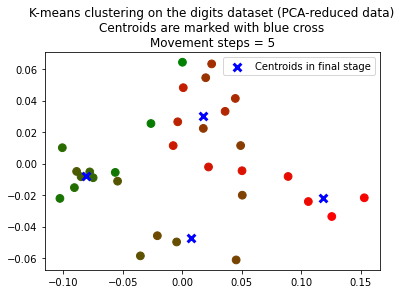

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=30
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()
plt.show()